In [20]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [21]:
# Load datasets
core_ev = pd.read_csv('EV_Dataset.csv')
extended_ev = pd.read_csv('Extended_EV_Dataset.csv')
vehicle_info = pd.read_csv('General_Vehicle_Type_Dataset.csv')

In [22]:
# Clean up column names
core_ev.columns = core_ev.columns.str.strip()
extended_ev.columns = extended_ev.columns.str.strip()
vehicle_info.columns = vehicle_info.columns.str.strip()

In [23]:
# Inspect column names and dimensions
print("Core EV Data Columns:", core_ev.columns.tolist())
print("Core EV Data Shape:", core_ev.shape)

print("Extended EV Data Columns:", extended_ev.columns.tolist())
print("Extended EV Data Shape:", extended_ev.shape)

print("Vehicle Info Columns:", vehicle_info.columns.tolist())
print("Vehicle Info Data Shape:", vehicle_info.shape)

Core EV Data Columns: ['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro', 'INR']
Core EV Data Shape: (100, 16)
Extended EV Data Columns: ['BodyStyle', 'Segment', 'Seats', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Battery_Pack Kwh', 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain', 'PlugType', 'PriceEuro', 'INR', 'Brand', 'Model']
Extended EV Data Shape: (100, 16)
Vehicle Info Columns: ['Brand', 'Model', 'VehicleType', 'FuelType', 'EngineCC', 'Mileage_kmpl', 'Battery_kWh', 'Range_km', 'SeatingCapacity', 'Transmission', 'EmissionStandard', 'Price_INR']
Vehicle Info Data Shape: (100, 12)


In [24]:
# Merge datasets on Model
merged = pd.merge(core_ev, extended_ev, how='outer', on='Model')
merged = pd.merge(merged, vehicle_info, how='outer', on='Model')

In [25]:
# Summary statistics
summary_cols = ['Brand', 'Model', 'TopSpeed_KmH', 'Range_Km', 'Battery_Pack Kwh', 
                'Efficiency_WhKm', 'FastCharge_KmH', 'Seats', 'PriceEuro']
summary_cols_present = [col for col in summary_cols if col in merged.columns]
print("\nSummary Statistics:\n", merged[summary_cols_present].describe(include='all'))


Summary Statistics:
         Brand     Model
count     100       300
unique      9       220
top     Honda  Tiago EV
freq       18         8


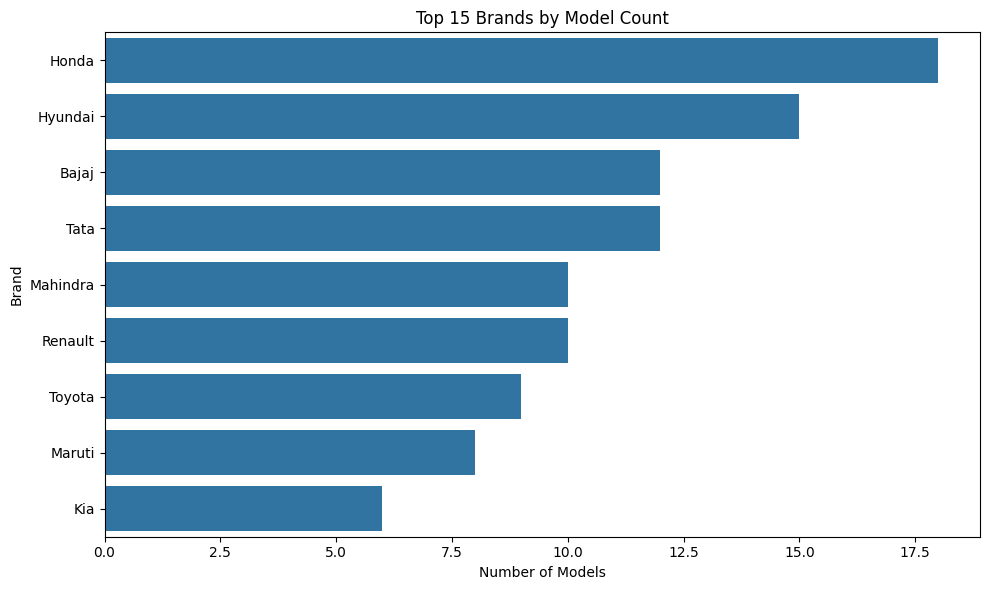

In [30]:
# Visualizations
if 'Brand' in merged.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged, y='Brand', order=merged['Brand'].value_counts().index[:15])
    plt.title('Top 15 Brands by Model Count')
    plt.xlabel('Number of Models')
    plt.ylabel('Brand')
    plt.tight_layout()
    plt.show()

if 'TopSpeed_KmH' in merged.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged['TopSpeed_KmH'], kde=True, bins=30)
    plt.title('Top Speed Distribution')
    plt.xlabel('Top Speed (Km/H)')
    plt.tight_layout()
    plt.show()

if 'Range_Km' in merged.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged['Range_Km'], kde=True, bins=30)
    plt.title('Range Distribution')
    plt.xlabel('Range (Km)')
    plt.tight_layout()
    plt.show()

if 'Battery_Pack Kwh' in merged.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged['Battery_Pack Kwh'], kde=True, bins=30)
    plt.title('Battery Pack Size Distribution')
    plt.xlabel('Battery Pack (kWh)')
    plt.tight_layout()
    plt.show()

if 'Efficiency_WhKm' in merged.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged['Efficiency_WhKm'], kde=True, bins=30)
    plt.title('Efficiency (Wh/km) Distribution')
    plt.xlabel('Efficiency (Wh/km)')
    plt.tight_layout()
    plt.show()

if 'PriceEuro' in merged.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(merged['PriceEuro'], kde=True, bins=30)
    plt.title('Price Distribution in Euros')
    plt.xlabel('Price (Euro)')
    plt.tight_layout()
    plt.show()

if 'Seats' in merged.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=merged, x='Seats', order=merged['Seats'].value_counts().index)
    plt.title('Seat Count Distribution')
    plt.xlabel('Number of Seats')
    plt.tight_layout()
    plt.show()

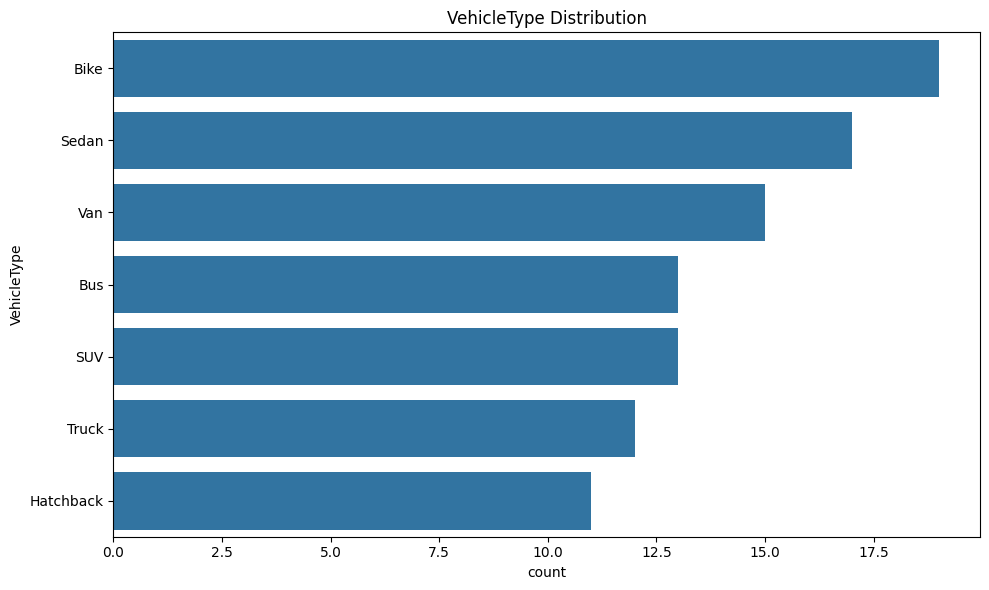

In [31]:
# Check and plot for common category columns
category_cols = ['BodyStyle', 'Segment', 'VehicleType', 'Vehicle Type']
for col in category_cols:
    if col in merged.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=merged, y=col, order=merged[col].value_counts().index[:10])
        plt.title(f'{col} Distribution')
        plt.tight_layout()
        plt.show()

In [32]:
# Check for missing values
missing = merged.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])



Missing Values:
 Brand_x               200
AccelSec_x            200
TopSpeed_KmH_x        200
Range_Km_x            200
Battery_Pack Kwh_x    200
Efficiency_WhKm_x     200
FastCharge_KmH_x      200
RapidCharge_x         200
PowerTrain_x          200
PlugType_x            200
BodyStyle_x           200
Segment_x             200
Seats_x               200
PriceEuro_x           200
INR_x                 200
BodyStyle_y           200
Segment_y             200
Seats_y               200
AccelSec_y            200
TopSpeed_KmH_y        200
Range_Km_y            200
Battery_Pack Kwh_y    200
Efficiency_WhKm_y     200
FastCharge_KmH_y      200
RapidCharge_y         200
PowerTrain_y          200
PlugType_y            200
PriceEuro_y           200
INR_y                 200
Brand_y               200
Brand                 200
VehicleType           200
FuelType              200
EngineCC              229
Mileage_kmpl          229
Battery_kWh           271
Range_km              271
SeatingCapacity     

In [33]:
# Fill missing numerical values with median
for col in merged.select_dtypes(include='number').columns:
    merged[col].fillna(merged[col].median(), inplace=True)

C:\Users\sudharshan\AppData\Local\Temp\ipykernel_12028\832086240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].fillna(merged[col].median(), inplace=True)
C:\Users\sudharshan\AppData\Local\Temp\ipykernel_12028\832086240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [34]:
# Fill missing categorical with "Unknown"
for col in merged.select_dtypes(include='object').columns:
    merged[col].fillna('Unknown', inplace=True)

print("✅ Data Cleaning Complete and Graphs Plotted!")

✅ Data Cleaning Complete and Graphs Plotted!


C:\Users\sudharshan\AppData\Local\Temp\ipykernel_12028\969153862.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged[col].fillna('Unknown', inplace=True)
